# CS 445 Final Project - Image Morphing

## Setup and Load Images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


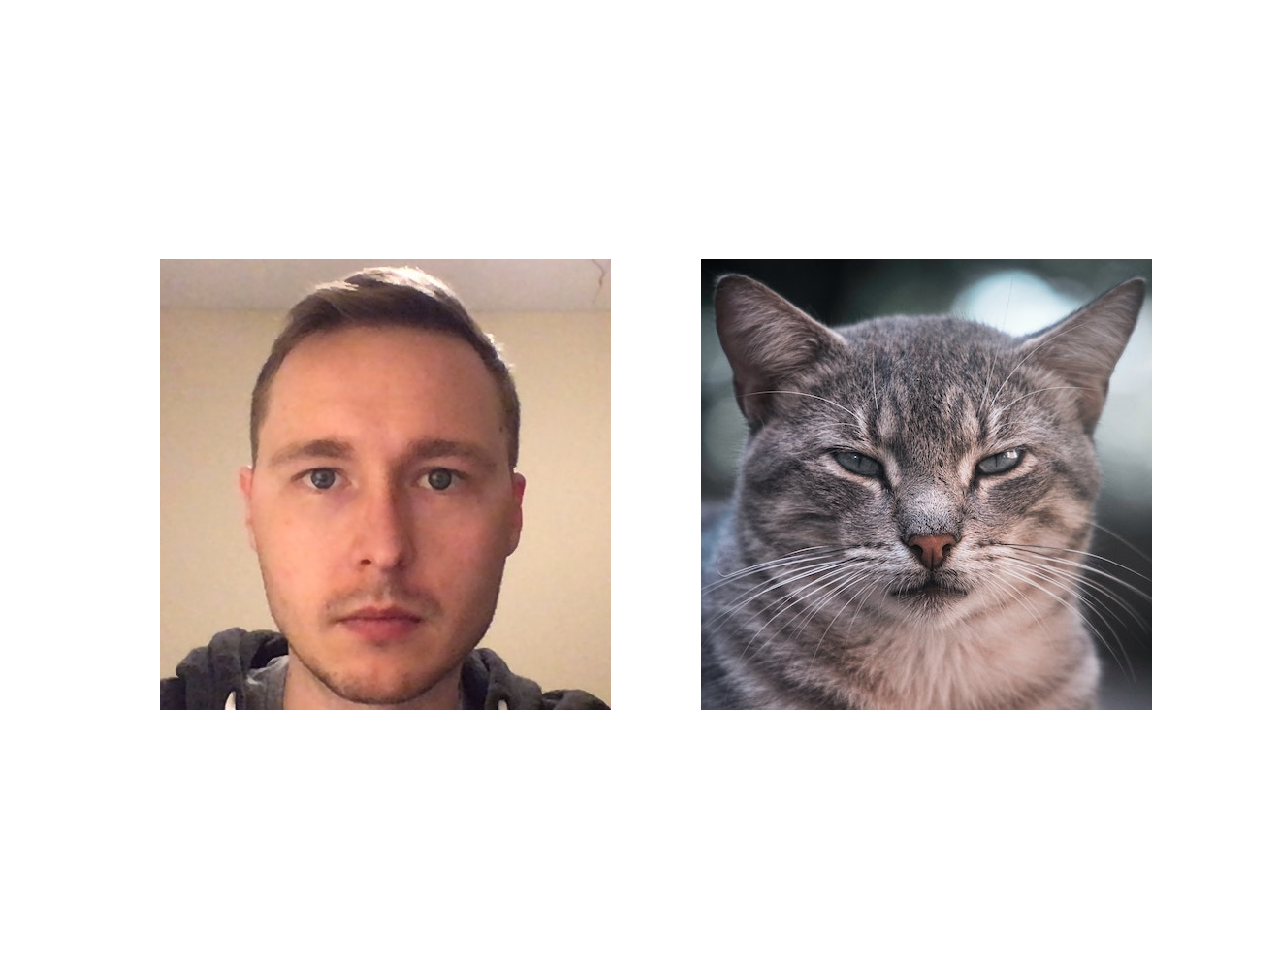

In [28]:
# Read in the source and target images
source_img = cv2.imread('./images/inputs/andrew.jpg')
target_img = cv2.imread('./images/inputs/cat.jpg')

assert source_img.shape == target_img.shape
H, W, C = source_img.shape

fix, axes = plt.subplots(1, 2)
[a.axis('off') for a in axes.ravel()]
axes[0].imshow(cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))

## Select Corresponding Points

In [16]:
'''
Display the image and collect points clicked on the image.

Heavily referenced from UIUC CS445 MP3 utils.py in starter code.
'''
def specify_points(img):
    fig = plt.figure()
    fig.set_label('Select corresponding points in the image')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    clicked = []
    
    def on_mouse_pressed(event):
        x = event.xdata
        y = event.ydata
        plt.plot(x, y, 'r+')
        clicked.append((x, y))
        
    fig.canvas.mpl_connect('button_press_event', on_mouse_pressed)
    
    return clicked

<IPython.core.display.Javascript object>


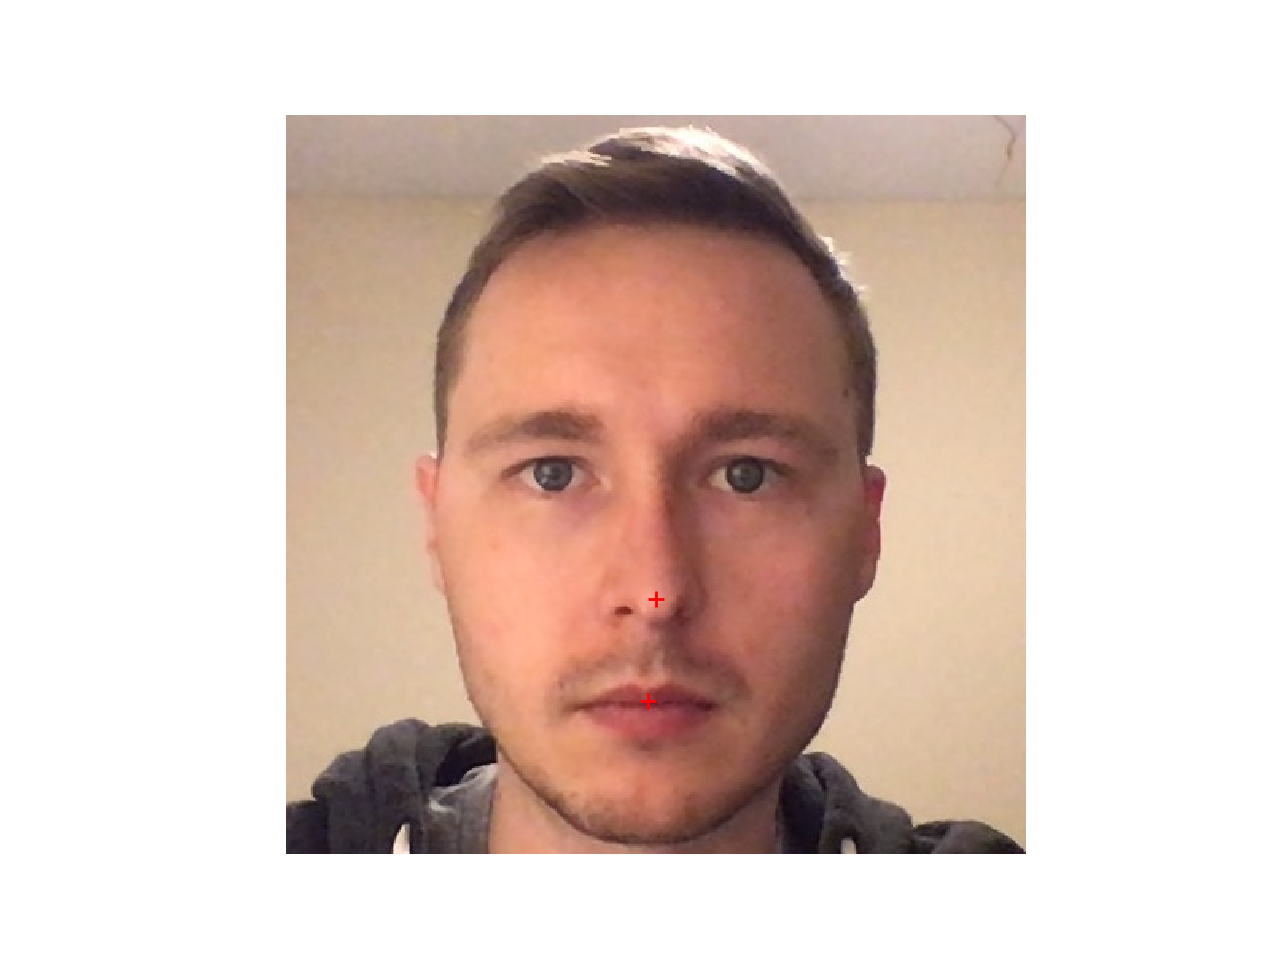

In [22]:
# Select corresponding points on the images
%matplotlib notebook
source_points = specify_points(source_img)

<IPython.core.display.Javascript object>


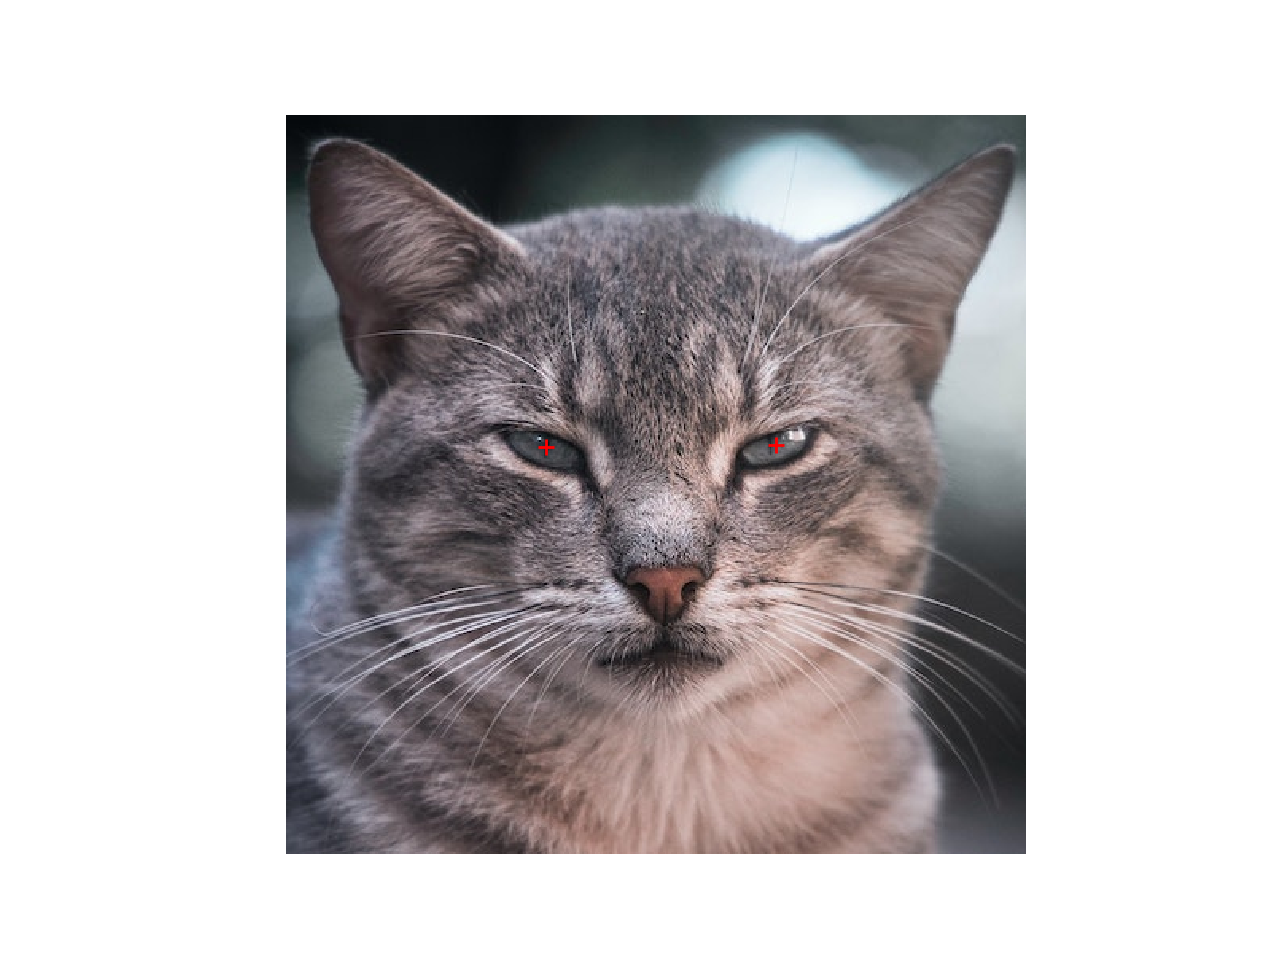

In [24]:
%matplotlib notebook
target_points = specify_points(target_img)

In [ ]:
assert len(source_points) == len(target_points)
print(source_points)
print(target_points)

In [30]:
# Add the points at the corners of the images
source_points.extend([(0, 0), (0, W-1), (H-1, 0), (H-1, W-1)])
target_points.extend([(0, 0), (0, W-1), (H-1, 0), (H-1, W-1)])
print(source_points)

[(232.0786323051948, 303.5632609577922), (227.04616477272725, 367.72722199675326), (0, 0), (0, 464), (464, 0), (464, 464), (0, 0), (0, 464), (464, 0), (464, 464)]


## Compute Delaunay Triangulation